In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv("dataset.csv")
data = data.iloc[:,0:6]
y = data.loc[:,['Close/Last','Date']]
y = data.iloc[:,0:2]
data = data.drop(['Close/Last'],axis='columns')
print(data.head(5))
print(y.head(5))

           Date     Volume    Open    High     Low
0  Jul 09, 2020   58588000  279.40  270.26  278.86
1  Jul 08, 2020   81556500  281.00  262.27  273.18
2  Jul 07, 2020  107448500  281.00  267.34  277.97
3  Jul 06, 2020  102849500  255.34  253.21  274.32
4  Jul 02, 2020   86250500  244.30  237.12  241.73
           Date  Close/Last
0  Jul 09, 2020      281.71
1  Jul 08, 2020      283.45
2  Jul 07, 2020      285.90
3  Jul 06, 2020      275.56
4  Jul 02, 2020      245.60


In [3]:
y = y.set_index('Date')
y.index = pd.to_datetime(y.index,unit='ns')
print(y.index)

DatetimeIndex(['2020-07-09', '2020-07-08', '2020-07-07', '2020-07-06',
               '2020-07-02', '2020-07-01', '2020-06-30', '2020-06-29',
               '2020-06-26', '2020-06-25',
               ...
               '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
               '2015-07-17', '2015-07-16', '2015-07-15', '2015-07-14',
               '2015-07-13', '2015-07-10'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)


In [4]:
data = data.set_index('Date')
data.index = pd.to_datetime(data.index,unit='ns')
print(data.index)

DatetimeIndex(['2020-07-09', '2020-07-08', '2020-07-07', '2020-07-06',
               '2020-07-02', '2020-07-01', '2020-06-30', '2020-06-29',
               '2020-06-26', '2020-06-25',
               ...
               '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
               '2015-07-17', '2015-07-16', '2015-07-15', '2015-07-14',
               '2015-07-13', '2015-07-10'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)


In [5]:
import sklearn
from sklearn.model_selection import train_test_split

X_train = data[400:]
X_test = data[:400]

y_train = y[400:]
y_test = y[:400]

In [6]:
aim = ['Close/Last']

In [7]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('TESLA/USD', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

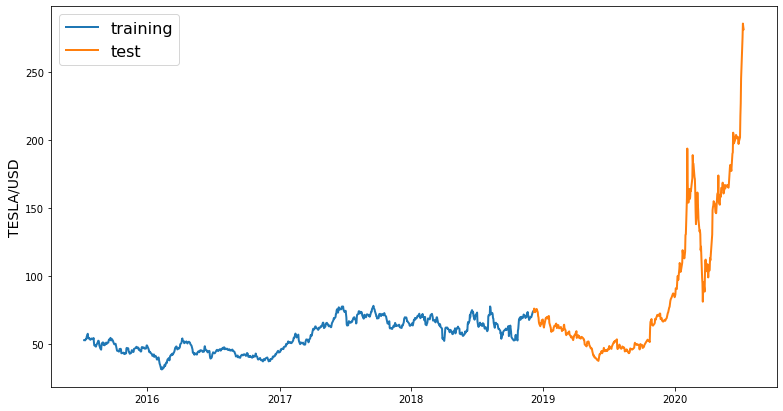

In [8]:
line_plot(y_train[aim], y_test[aim], 'training', 'test', title='')

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [11]:
import numpy as np
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test,axis=1)

In [12]:
X_train.shape

(859, 1, 4)

In [13]:
from tensorflow.python.keras.layers import SimpleRNNCell
from tensorflow.python.keras.layers import RNN
def build_RNN_model(input_data, output_size, neurons, activ_func='tanh',
                     dropout=0.21, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(RNN(cell=[SimpleRNNCell(256),
                                      SimpleRNNCell(512),
                                      SimpleRNNCell(1024)],input_shape=(1,4)))
    model.add(Dropout(dropout))
    model.add(Dense(units=64*4))
    model.add(Activation("relu"))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model
np.random.seed(1024)
rnn_neurons = 256
epochs = 16
batch_size = 32
loss = 'mse'
dropout = 0.25
optimizer = 'adam'

In [14]:
model = build_RNN_model(
    X_train, output_size=1, neurons=rnn_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
modelfit = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Epoch 1/16
27/27 [==============================] - 4s 61ms/step - loss: 0.0321 - val_loss: 0.0044
Epoch 2/16
27/27 [==============================] - 1s 30ms/step - loss: 0.0042 - val_loss: 0.0030
Epoch 3/16
27/27 [==============================] - 1s 31ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 4/16
27/27 [==============================] - 1s 31ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 5/16
27/27 [==============================] - 1s 31ms/step - loss: 0.0027 - val_loss: 0.0190
Epoch 6/16
27/27 [==============================] - 1s 31ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 7/16
27/27 [==============================] - 1s 31ms/step - loss: 0.0021 - val_loss: 4.7314e-04
Epoch 8/16
27/27 [==============================] - 1s 31ms/step - loss: 0.0022 - val_loss: 6.3293e-04
Epoch 9/16
27/27 [==============================] - 1s 31ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 10/16
27/27 [==============================] - 1s 31ms/step - loss: 0.0017 - val_loss: 6.9366e-

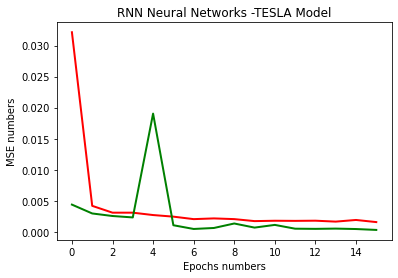

In [15]:
import matplotlib.pyplot as plt
plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('RNN Neural Networks -TESLA Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [16]:
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.013904298650477345

In [17]:
from sklearn.metrics import mean_squared_error
SCORE_MSE=mean_squared_error(preds, y_test)
SCORE_MSE

0.00032030355024884543

In [18]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, preds)
r2_score*100

99.27400065862942

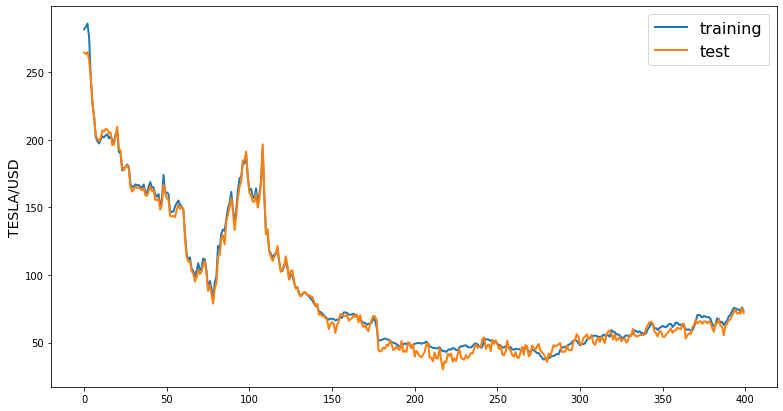

In [19]:
y_testt = scaler.inverse_transform(y_test)
predd = scaler.inverse_transform(preds.reshape(400,1))
line_plot(y_testt, predd, 'training', 'test', title='')

In [20]:
prediction = np.array([18337900,1043.21,1048.44,1022.44]).reshape(1,4)
prediction = np.expand_dims(prediction, axis=0)

In [21]:
predictions = model.predict(prediction)
predictions[0][0]

0.8326611

In [22]:
prediction = scaler.inverse_transform(predictions)
prediction[0][0]

244.30624

In [23]:
real = 245.6
accuracy = prediction[0][0]/real
print(f"""{predictions[0][0]} equals of {prediction[0][0]} == Prediction
Real Tesla Value (for 02/7/2020) is 245.6 USD
RNN Accuracy is {accuracy*100} """)

0.8326610922813416 equals of 244.30624389648438 == Prediction
Real Tesla Value (for 02/7/2020) is 245.6 USD
RNN Accuracy is 99.47322634221678 
